[**Demo %s**](#demo-structure-linalg)


The following generates a random sparse matrix with prescribed eigenvalues.

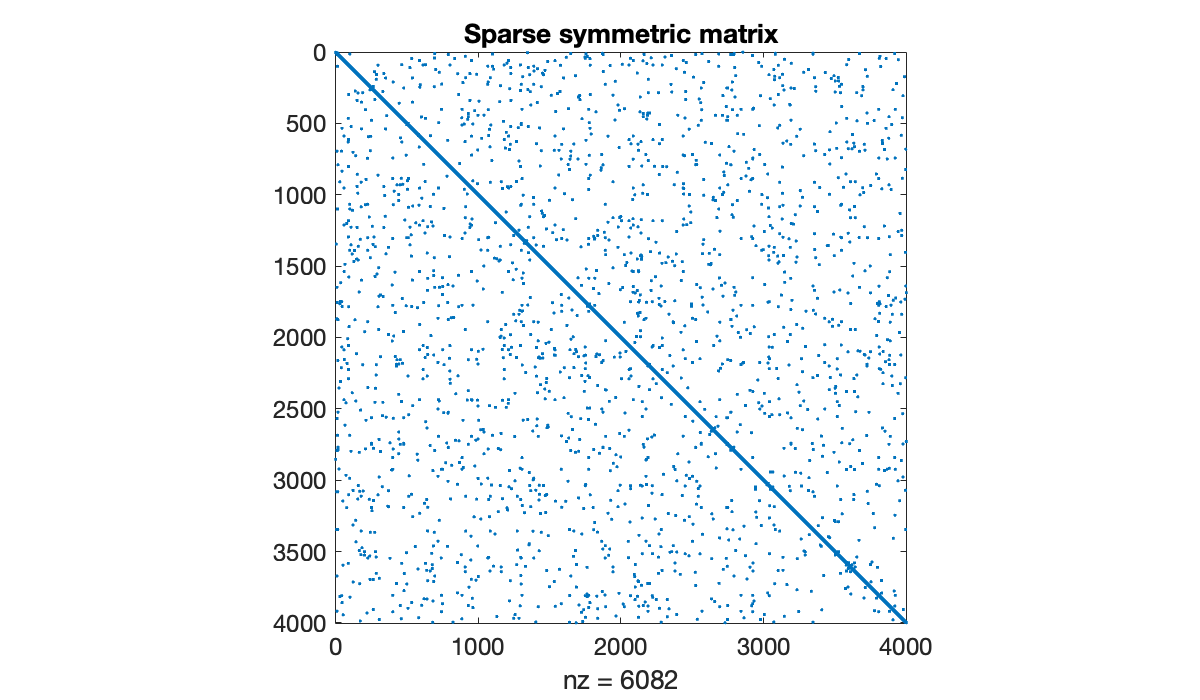

In [2]:
n = 4000;
density = 4e-4;
lambda = 1 ./ (1:n);
A = sprandsym(n, density, lambda);
clf,  spy(A)
title('Sparse symmetric matrix')  

```{index} ! MATLAB; eigs
```

The `eigs` function finds a small number eigenvalues meeting some criterion. First, we ask for the 5 of largest (complex) magnitude.

In [3]:
[V, D] = eigs(A, 5);    % largest magnitude
1 ./ diag(D)            % should be 1, 2, 3, 4, 5

ans = 5×1 double
    1.0000
    2.0000
    3.0000
    4.0000
    5.0000

Now we find the 4 closest to the value 0.03 in the complex plane.

In [4]:
[V, D] = eigs(A, 4, 0.03);    % closest to 0.03
diag(D)

ans = 4×1 double
    0.0303
    0.0294
    0.0312
    0.0286

```{index} MATLAB; \\
```

The time needed to solve a sparse linear system is not easy to predict unless you have some more information about the matrix. But it will typically be orders of magnitude faster than the dense version of the same problem.

In [5]:
x = 1 ./ (1:n)';  
b = A * x;
tic, sparse_err = norm(x - A\b), sparse_time = toc

sparse_err = 1.0980e-13

sparse_time = 0.0073

In [6]:
F = full(A);
tic, dense_err = norm(x - F\b), dense_time = toc

dense_err = 1.0982e-13

dense_time = 0.2560